In [2]:
#Adam Bloodgood

# Import required libraries.
import sys           # Read system parameters.
import pandas as pd  # Manipulate and analyze data.
import sqlite3       # Manage SQL databases.
import pickle
import numpy as np                  # Work with multi-dimensional arrays.
from scipy.stats import linregress
import matplotlib                   # Create and format charts.
import matplotlib.pyplot as plt  
import seaborn as sns               # Make charting easier.
import sportypy
from sportypy.surfaces.hockey import NHLRink
import math

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- pandas {}'.format(pd.__version__))
print('- sqlite3 {}'.format(sqlite3.sqlite_version))

Libraries used in this project:
- Python 3.12.2 (tags/v3.12.2:6abddd9, Feb  6 2024, 21:26:36) [MSC v.1937 64 bit (AMD64)]
- pandas 2.2.3
- sqlite3 3.43.1


In [3]:
# Read in data from pickle file
data = pd.read_pickle("2023-24_goaltender_shot_difficulty_metrics.pickle")

# Create a minimum number of shots for a goaltender to qualify for the distribution
MIN_SHOTS = 500

data = data[data['shots'] >= MIN_SHOTS]

#MIN_GOALS = 10
#data = data[data['goals'] >= MIN_GOALS]

#data = data[data['goals'] >= MIN_GOALS]

#Generate rankings for players based on different metrics
len_array = []
for i in range(1, len(data)+1):
    len_array.append(int(i))

data = data.sort_values(by = ['sv%'], ascending=False)
data['sv ranking'] = len_array
data = data.sort_values(by = ['adjusted sv%'], ascending=False)
data['adjusted sv ranking'] = len_array

len_array = []
for i in range(1, len(data)+1):
    len_array.append(float(i))

data['expected sv%'] = len_array
data['sv per. above expected'] = len_array

#Generate lines of best fit 
slope, intercept, r_value, p_value, std_err = linregress(data['avg. shot difficulty'], data['sv%'])

pp_slope, pp_intercept, r_value, p_value, std_err = linregress(data['avg. pp shot difficulty'], data['pp sv%'])

ev_slope, ev_intercept, r_value, p_value, std_err = linregress(data['avg. ev shot difficulty'], data['ev sv%'])

#Calculate more metrics
data['rating difference'] = len_array
for index, player in data.iterrows():
    data.at[index, 'rating difference'] = int(player['sv ranking'] - player['adjusted sv ranking'])
    expected = (slope * player['avg. shot difficulty']) + intercept
    data.at[index, 'expected sv%'] = expected
    data.at[index, 'sv per. above expected'] = (player['sv%'] / expected) - 1
    pp_expected = (pp_slope * player['avg. pp shot difficulty']) + pp_intercept
    data.at[index, 'expected pp sv%'] = pp_expected
    data.at[index, 'pp sv per. above expected'] = (player['pp sv%'] / pp_expected) - 1
    ev_expected = (ev_slope * player['avg. ev shot difficulty']) + ev_intercept
    data.at[index, 'expected ev sv%'] = expected
    data.at[index, 'ev sv per. above expected'] = (player['ev sv%'] / ev_expected) - 1
    data.at[index, 'ev to pp shot difference'] = player['avg. ev shot difficulty'] - player['avg. pp shot difficulty'] 

#Create copies of the dataframe by position
#data = data.filter(like='Stolarz, Anthony', axis = 0) #Search for specific player
data = data.sort_values(by = ['sv per. above expected'], ascending=False)


with pd.option_context('display.max_columns', None): display(data)


,position,avg. shot difficulty,avg. goal difficulty,adjusted sv%,shot-goal difference,avg. pp shot difficulty,avg. pp goal difficulty,adjusted pp sv%,pp shot-goal difference,avg. ev shot difficulty,avg. ev goal difficulty,adjusted ev sv%,ev shot-goal difference,shots,pp shots,ev shots,goals against,pp goals against,ev goals against,sv%,pp sv%,ev sv%,save locations,pp save locations,ev save locations,goal locations,pp goal locations,ev goal locations,sv ranking,adjusted sv ranking,expected sv%,sv per. above expected,rating difference,expected pp sv%,pp sv per. above expected,expected ev sv%,ev sv per. above expected,ev to pp shot difference
"Stolarz, Anthony",G,0.922950,0.873848,0.850198,-0.049102,0.906392,0.889215,0.774393,-0.017177,0.926085,0.867446,0.864800,-0.058640,647,103,544,51,15,36,0.921175,0.854369,0.933824,"[[74, 5, right], [43, 23, right], [71, 21, rig...","[[64, -32, right], [82, -2, right], [70, 2, ri...","[[74, 5, right], [43, 23, right], [71, 21, rig...","[[-81, -9, left], [-66, 4, left], [-61, 7, lef...","[[-81, -9, left], [-66, 4, left], [80, 2, righ...","[[-61, 7, left], [-76, -19, left], [57, 18, ri...",2,4,0.895474,0.028701,-2.0,0.852203,0.002541,0.895474,0.033665,0.019694
"Brossoit, Laurent",G,0.928813,0.891109,0.857488,-0.037704,0.916012,0.898159,0.779137,-0.017854,0.931045,0.888245,0.871338,-0.042799,586,87,499,45,13,32,0.923208,0.850575,0.935872,"[[56, -38, right], [46, -9, right], [68, -26, ...","[[50, -8, right], [66, -27, right], [-52, -12,...","[[56, -38, right], [46, -9, right], [68, -26, ...","[[51, -8, right], [-85, -2, left], [-61, 7, le...","[[51, -8, right], [79, 14, right], [84, -4, ri...","[[-85, -2, left], [-61, 7, left], [-80, 0, lef...",1,1,0.900185,0.025577,0.0,0.858243,-0.008935,0.900185,0.030572,0.015032
"Hellebuyck, Connor",G,0.927305,0.873011,0.850030,-0.054295,0.914354,0.882523,0.787546,-0.031831,0.929787,0.869535,0.862166,-0.060252,1704,274,1430,142,38,104,0.916667,0.861314,0.927273,"[[-75, -6, left], [-55, -20, left], [-84, 3, l...","[[-84, 3, left], [-74, -17, left], [86, -14, r...","[[-75, -6, left], [-55, -20, left], [-61, -13,...","[[-74, 7, left], [-32, 18, left], [54, -1, rig...","[[-74, 7, left], [84, -8, right], [71, 7, righ...","[[-32, 18, left], [54, -1, right], [-78, -3, l...",4,5,0.898973,0.019682,-1.0,0.857202,0.004796,0.898973,0.022445,0.015433
"Rittich, David",G,0.928745,0.875864,0.852131,-0.052881,0.930009,0.898095,0.833288,-0.031914,0.928408,0.867836,0.857144,-0.060572,594,125,469,49,13,36,0.917508,0.896000,0.923241,"[[82, 3, right], [86, 8, right], [38, 21, righ...","[[-48, 17, left], [-81, 5, left], [83, -2, rig...","[[82, 3, right], [86, 8, right], [38, 21, righ...","[[38, 15, right], [59, -4, right], [-87, -2, l...","[[38, 15, right], [-77, 2, left], [-42, 8, lef...","[[59, -4, right], [-87, -2, left], [-31, 20, l...",3,2,0.900130,0.019307,1.0,0.867030,0.033412,0.900130,0.019467,-0.001600
"Demko, Thatcher",G,0.926020,0.884663,0.845752,-0.041358,0.914349,0.908044,0.818102,-0.006306,0.928480,0.878396,0.851635,-0.050084,1419,247,1172,123,26,97,0.913319,0.894737,0.917235,"[[77, 11, right], [57, -28, right], [85, -9, r...","[[-76, 17, left], [-38, -10, left], [-91, 4, l...","[[77, 11, right], [57, -28, right], [85, -9, r...","[[-82, 23, left], [-40, -7, left], [-69, -3, l...","[[-82, 23, left], [79, 3, right], [78, -20, ri...","[[-40, -7, left], [-69, -3, left], [-64, -23, ...",5,8,0.897941,0.017126,-3.0,0.857199,0.043791,0.897941,0.012760,0.014131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Korpisalo, Joonas",G,0.926690,0.890554,0.818950,-0.036135,0.911213,0.875622,0.745923,-0.035591,0.929395,0.895069,0.831922,-0.034326,1445,215,1230,168,39,129,0.883737,0.818605,0.895122,"[[-77, 5, left], [-67, -7, left], [-43, 15, le...","[[50, -16, right], [83, -1, right], [47, -8, r...","[[-77, 5, left], [-67, -7, left], [-43, 15, le...","[[84, 5, right], [74, -31, r

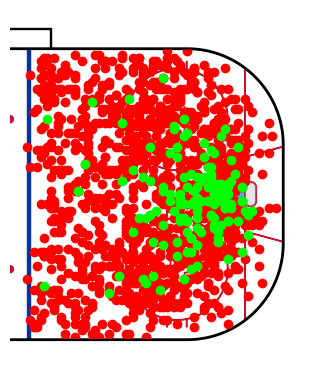

In [13]:
#Generate shot chart of individual players

player_data = data.filter(like='Shesterkin, Igor', axis = 0) #Search for specific player

x_coords_shots = []
y_coords_shots = []
shots = player_data['save locations'].iloc[0]
for i in range(0, len(shots)):
    if shots[i][2] == 'left':
        x = shots[i][0] * -1
        y = shots[i][1] * -1
    else:
        x = shots[i][0]
        y = shots[i][1]
    
    x_coords_shots.append(x)
    y_coords_shots.append(y)

x_coords_goals = []
y_coords_goals = []
shots = player_data['goal locations'].iloc[0]
for i in range(0, len(shots)):
    if shots[i][2] == 'left':
        x = shots[i][0] * -1
        y = shots[i][1] * -1
    else:
        x = shots[i][0]
        y = shots[i][1]
    
    x_coords_goals.append(x)
    y_coords_goals.append(y)

nhl = NHLRink()
fig, ax = plt.subplots(1, 1)
nhl.draw(display_range="ozone", ax = ax)

nhl.scatter(x_coords_shots, y_coords_shots, color = '#ff0000')
nhl.scatter(x_coords_goals, y_coords_goals, color = '#00ff00')



Text(0, 0.5, 'Number of Players')

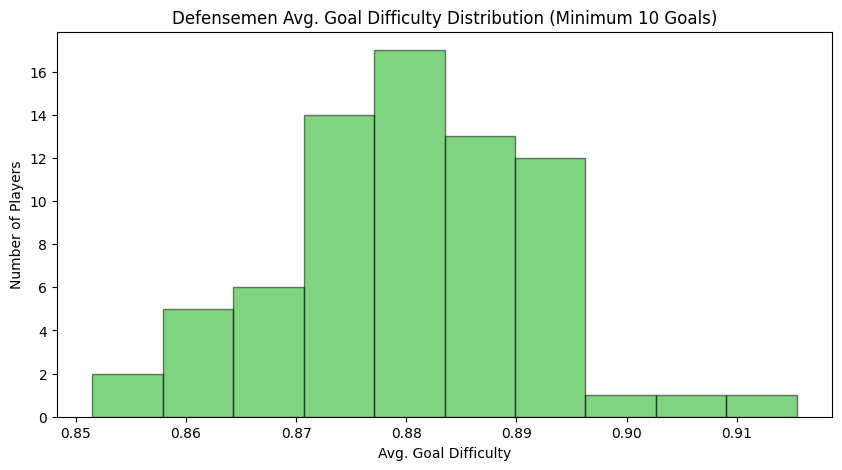

In [5]:
# Print histogram of distribution
data['avg. goal difficulty'].hist(figsize = (10,5), color = '#00aa00', alpha = 0.5,
                        edgecolor = 'black', grid = False)
plt.title(f"Defensemen Avg. Goal Difficulty Distribution (Minimum 10 Goals)")
plt.xlabel("Avg. Goal Difficulty")
plt.ylabel("Number of Players")

Text(0.5, 1.0, 'Average Shot Difficulty VS Shooting %')

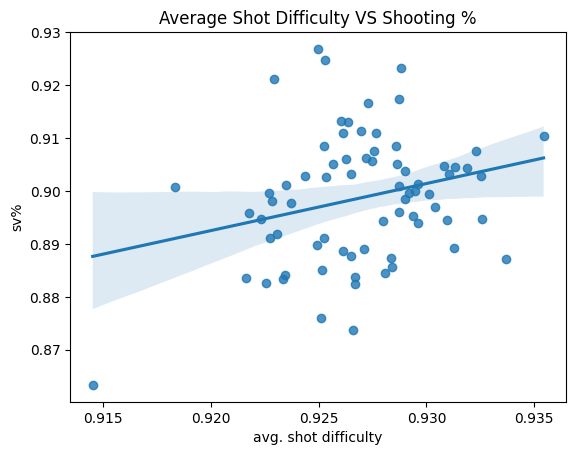

In [7]:
# Show scatter plot with line of best fit
sns.regplot(data = data, x = 'avg. shot difficulty', y = 'sv%')
plt.title("Average Shot Difficulty VS Shooting %")

In [5]:
# Show statistical numbers of distribution
data['sv per. above expected'].describe()

count    6.600000e+01
mean     3.548151e-09
std      1.162252e-02
min     -2.745476e-02
25%     -8.221686e-03
50%      1.077298e-03
75%      7.349354e-03
max      2.870057e-02
Name: sv per. above expected, dtype: float64

Text(0.5, 1.0, 'Avg. Shot Difficulty VS. SV%')

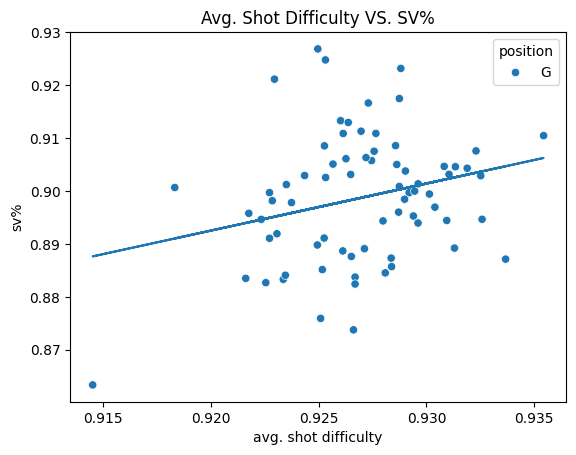

In [11]:
sns.scatterplot(data = data, x = 'avg. shot difficulty',
               y = 'sv%', hue = 'position')
plt.plot(data['avg. shot difficulty'], slope * data['avg. shot difficulty'] + intercept)
plt.title("Avg. Shot Difficulty VS. SV%")


In [7]:
from great_tables import GT, md, style, loc

MIN_SHOTS = 80
MIN_GOALS = 10

table_used = data

#new_data = table_used[table_used['ev shots'] >= MIN_PP_SHOTS]
new_data = table_used[table_used['goals against'] >= MIN_GOALS]
#new_data = table_used



metric = 'avg. goal difficulty'
top_data = pd.DataFrame(new_data.sort_values(by = metric, ascending=False).head(n=5)[metric]).reset_index().rename(columns={'index': 'Player'})
bottom_data = pd.DataFrame(new_data.sort_values(by = metric, ascending=True).head(n=5)[metric]).reset_index().rename(columns={'index': 'Player'})

for index, player in top_data.iterrows():
    top_data.at[index, metric] = round(top_data.at[index, metric], 4)
for index, player in bottom_data.iterrows():
    bottom_data.at[index, metric] = round(bottom_data.at[index, metric], 4)
display(top_data)
display(bottom_data)

display(
    GT(top_data)
    .tab_header(title= md(f"**Top 5 {metric}**"), subtitle="Minimum 10 goals.")
    .tab_style(style = style.text(weight = 'bold'), locations = loc.body(columns = 'Player'))\
    .tab_stub(rowname_col='Player')
)
display(
    GT(bottom_data)
    .tab_header(title=md(f"**Bottom 5 {metric}**"), subtitle="Minimum 10 goals.")
    .tab_style(style = style.text(weight = 'bold'), locations = loc.body(columns = 'Player'))
    .tab_stub(rowname_col='Player')
)

,Player,avg. goal difficulty
0,"Tarasov, Daniil",0.9155
1,"Kahkonen, Kaapo",0.9077
2,"Levi, Devon",0.8953
3,"Soderblom, Arvid",0.8946
4,"Hill, Adin",0.8931


,Player,avg. goal difficulty
0,"Quick, Jonathan",0.8539
1,"Merzlikins, Elvis",0.8601
2,"Lankinen, Kevin",0.8606
3,"DeSmith, Casey",0.8613
4,"Reimer, James",0.8613


GT(_tbl_data=             Player  avg. goal difficulty
0   Tarasov, Daniil                0.9155
1   Kahkonen, Kaapo                0.9077
2       Levi, Devon                0.8953
3  Soderblom, Arvid                0.8946
4        Hill, Adin                0.8931, _body=<great_tables._gt_data.Body object at 0x000001B1CB3A2690>, _boxhead=Boxhead([ColInfo(var='Player', type=<ColInfoTypeEnum.stub: 2>, column_label='Player', column_align='left', column_width=None), ColInfo(var='avg. goal difficulty', type=<ColInfoTypeEnum.default: 1>, column_label='avg. goal difficulty', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001B1C81D8AA0>, _spanners=Spanners([]), _heading=Heading(title=Md(text='**Top 5 avg. goal difficulty**'), subtitle='Minimum 10 goals.', preheader=None), _stubhead=None, _source_notes=[], _footnotes=[], _styles=[StyleInfo(locname='data', locnum=5, grpname=None, colname='Player', rownum=0, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style=None, weight='bold', stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname='data', locnum=5, grpname=None, colname='Player', rownum=1, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style=None, weight='bold', stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname='data', locnum=5, grpname=None, colname='Player', rownum=2, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style=None, weight='bold', stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname='data', locnum=5, grpname=None, colname='Player', rownum=3, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style=None, weight='bold', stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname='data', locnum=5, grpname=None, colname='Player', rownum=4, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style=None, weight='bold', stretch=None, decorate=None, transform=None, whitespace=None)])], _locale=<great_tables._gt_data.Locale object at 0x000001B1C7C12840>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=Op

GT(_tbl_data=              Player  avg. goal difficulty
0    Quick, Jonathan                0.8539
1  Merzlikins, Elvis                0.8601
2    Lankinen, Kevin                0.8606
3     DeSmith, Casey                0.8613
4      Reimer, James                0.8613, _body=<great_tables._gt_data.Body object at 0x000001B1C81D8AA0>, _boxhead=Boxhead([ColInfo(var='Player', type=<ColInfoTypeEnum.stub: 2>, column_label='Player', column_align='left', column_width=None), ColInfo(var='avg. goal difficulty', type=<ColInfoTypeEnum.default: 1>, column_label='avg. goal difficulty', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000001B1CB4BFCB0>, _spanners=Spanners([]), _heading=Heading(title=Md(text='**Bottom 5 avg. goal difficulty**'), subtitle='Minimum 10 goals.', preheader=None), _stubhead=None, _source_notes=[], _footnotes=[], _styles=[StyleInfo(locname='data', locnum=5, grpname=None, colname='Player', rownum=0, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style=None, weight='bold', stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname='data', locnum=5, grpname=None, colname='Player', rownum=1, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style=None, weight='bold', stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname='data', locnum=5, grpname=None, colname='Player', rownum=2, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style=None, weight='bold', stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname='data', locnum=5, grpname=None, colname='Player', rownum=3, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style=None, weight='bold', stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname='data', locnum=5, grpname=None, colname='Player', rownum=4, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style=None, weight='bold', stretch=None, decorate=None, transform=None, whitespace=None)])], _locale=<great_tables._gt_data.Locale object at 0x000001B1C7580D10>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top